<a href="https://colab.research.google.com/github/ehsankarami1358/ImagingSVHN/blob/main/YOLO5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-4-11 Python-3.11.12 torch-2.6.0+cu124 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


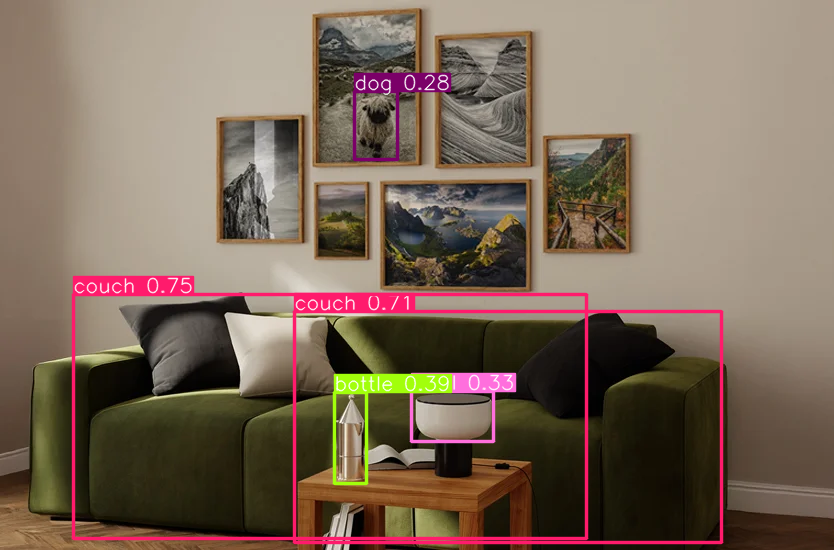

image 1/1: 550x834 1 dog, 1 bottle, 1 bowl, 2 couchs
Speed: 7.7ms pre-process, 270.4ms inference, 1.2ms NMS per image at shape (1, 3, 448, 640)
Saved 1 image to runs/detect/exp7


In [25]:
import torch
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
#Load the YOLO5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s') #Load the YOLO5 small model

#Function toperform object detection
def detect_objects(image_path):
    # Load image
    img = cv2.imread(image_path)
    img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    # Perform object detection
    results = model(img_rgb)
    #Results
    results.show()
    results.print()
    results.save()

image_path='desk.jpg'
detect_objects(image_path)

In [26]:
from google.colab.patches import cv2_imshow
def detect_objects_in_video(video_path,output_path):
    # Open the video file
    cap = cv2.VideoCapture(video_path)
    #Get video properties
    width=int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height=int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps=int(cap.get(cv2.CAP_PROP_FPS))
    #Define the codec and create Videowriter object
    fourcc=cv2.VideoWriter_fourcc(*'mp4v')
    out=cv2.VideoWriter(output_path,fourcc,fps,(width,height))

    while cap.isOpened():
        #Read a frame from the video
        ret,frame=cap.read()
        if not ret:
            break
        #Perform object detection on the frame
        results=model(frame)
        for img_result in results.render():
            out.write(cv2.cvtColor(img_result,cv2.COLOR_RGB2BGR))

        # Display the frame with detections
        # Using cv2_imshow() instead of cv2.imshow() to display in Colab
        cv2_imshow(img_result)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    #Release the video capture and writer objects
    cap.release()
    out.release()
    cv2.destroyAllWindows()
    print(f'processed video saved to {output_path}')
video_path='Video.mp4'
output_path='output.mp4'
detect_objects_in_video(video_path,output_path)

processed video saved to output.mp4
